In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [67]:
df=pd.read_csv('/home/milos/Desktop/my_projects/basketball_analysis/data/1949-2020_officialBoxScore.csv')

In [68]:
df

,gmDate,seasonType,season,teamWins,teamLosses,teamAbbr,teamLoc,teamRslt,teamDayOff,teamPTS,...,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,opptPoss,opptPace,matchWinner
0,1949-10-29,Regular,1949-50,0.0,0.0,DNN,Away,Loss,0.0,85.0,...,0.0,0.0,0.0,0.00,-0.00,0.00,0.00,0.0,0.0,TRI
1,1949-10-29,Regular,1949-50,0.0,0.0,DNN,Away,Loss,0.0,85.0,...,0.0,0.0,0.0,0.00,-0.00,0.00,0.00,0.0,0.0,TRI
2,1949-11-01,Regular,1949-50,0.0,0.0,SHE,Away,Loss,0.0,75.0,...,0.0,0.0,0.0,0.00,-0.00,0.00,0.00,0.0,0.0,ROC
3,1949-11-01,Regular,1949-50,0.0,0.0,DNN,Away,Loss,2.0,64.0,...,0.0,0.0,0.0,0.00,-0.00,0.00,0.00,0.0,0.0,INO
4,1949-11-01,Regular,1949-50,0.0,0.0,NYK,Away,Win,0.0,89.0,...,0.0,0.0,0.0,0.00,-0.00,0.00,0.00,0.0,0.0,NYK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127762,2020-09-24,Playoffs,2019-20,3.0,1.0,LAL,Away,Win,1.0,114.0,...,120.4,127.1,-6.7,0.48,22.03,2.00,0.36,89.7,89.7,LAL
127763,2020-09-25,Playoffs,2019-20,3.0,2.0,MIA,Away,Loss,1.0,108.0,...,119.6,106.7,12.9,0.46,24.12,2.64,0.64,101.2,101.2,BOS
127764,2020-09-26,Playoffs,2019-20,1.0,4.0,DEN,Away,Loss,1.0,107.0,...,119.1,108.9,10.2,0.49,23.71,1.85,0.46,98.2,98.2,LAL
127765,2020-09-27,Playoffs,2019-20,2.0,4.0,BOS,Away,Loss,1.0,113.0,...,125.2,113.2,12.0,0.50,27.13,2.50,0.50,99.9,99.9,MIA


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127767 entries, 0 to 127766
Columns: 124 entries, gmDate to matchWinner
dtypes: float64(114), object(10)
memory usage: 120.9+ MB


Sredjivanje matchWinner kolone

In [70]:
for i in range(len(df)):
    if df['teamAbbr'][i] == df['matchWinner'][i]: 
        df['matchWinner'][i] = 0
    else:
        df['matchWinner'][i] = 1

<ipython-input-70-9867253780d2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['matchWinner'][i] = 1
<ipython-input-70-9867253780d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['matchWinner'][i] = 0


Brisanje kolona za produzetke i sredjivanje ukupnog broja poena

In [71]:
for i in range(len(df)):
    df['teamPTS'][i] = df['teamPTS'][i] - df['teamPTS5'][i] - df['teamPTS6'][i] - df['teamPTS7'][i] - df['teamPTS8'][i] - df['teamPTS9'][i] - df['teamPTS10'][i] 
    df['opptPTS'][i] = df['opptPTS'][i] - df['opptPTS5'][i] - df['opptPTS6'][i] - df['opptPTS7'][i] - df['opptPTS8'][i] - df['opptPTS9'][i] - df['opptPTS10'][i] 

<ipython-input-71-e2c873f64601>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['teamPTS'][i] = df['teamPTS'][i] - df['teamPTS5'][i] - df['teamPTS6'][i] - df['teamPTS7'][i] - df['teamPTS8'][i] - df['teamPTS9'][i] - df['teamPTS10'][i]
<ipython-input-71-e2c873f64601>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['opptPTS'][i] = df['opptPTS'][i] - df['opptPTS5'][i] - df['opptPTS6'][i] - df['opptPTS7'][i] - df['opptPTS8'][i] - df['opptPTS9'][i] - df['opptPTS10'][i]


In [52]:
#df['matchWinner'] = pd.to_numeric(df['matchWinner']) #moramo jer je bio object

In [49]:
df.dtypes

gmDate          object
seasonType      object
season          object
teamWins       float64
teamLosses     float64
                ...   
opptAST/TO     float64
opptSTL/TO     float64
opptPoss       float64
opptPace       float64
matchWinner    float64
Length: 124, dtype: object

In [73]:
print(df.isnull().sum().sum())
df.dropna()

32


,gmDate,seasonType,season,teamWins,teamLosses,teamAbbr,teamLoc,teamRslt,teamDayOff,teamPTS,...,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,opptPoss,opptPace,matchWinner
0,1949-10-29,Regular,1949-50,0.0,0.0,DNN,Away,Loss,0.0,85.0,...,0.0,0.0,0.0,0.00,-0.00,0.00,0.00,0.0,0.0,1
1,1949-10-29,Regular,1949-50,0.0,0.0,DNN,Away,Loss,0.0,85.0,...,0.0,0.0,0.0,0.00,-0.00,0.00,0.00,0.0,0.0,1
2,1949-11-01,Regular,1949-50,0.0,0.0,SHE,Away,Loss,0.0,75.0,...,0.0,0.0,0.0,0.00,-0.00,0.00,0.00,0.0,0.0,1
3,1949-11-01,Regular,1949-50,0.0,0.0,DNN,Away,Loss,2.0,64.0,...,0.0,0.0,0.0,0.00,-0.00,0.00,0.00,0.0,0.0,1
4,1949-11-01,Regular,1949-50,0.0,0.0,NYK,Away,Win,0.0,89.0,...,0.0,0.0,0.0,0.00,-0.00,0.00,0.00,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127762,2020-09-24,Playoffs,2019-20,3.0,1.0,LAL,Away,Win,1.0,114.0,...,120.4,127.1,-6.7,0.48,22.03,2.00,0.36,89.7,89.7,0
127763,2020-09-25,Playoffs,2019-20,3.0,2.0,MIA,Away,Loss,1.0,108.0,...,119.6,106.7,12.9,0.46,24.12,2.64,0.64,101.2,101.2,1
127764,2020-09-26,Playoffs,2019-20,1.0,4.0,DEN,Away,Loss,1.0,107.0,...,119.1,108.9,10.2,0.49,23.71,1.85,0.46,98.2,98.2,1
127765,2020-09-27,Playoffs,2019-20,2.0,4.0,BOS,Away,Loss,1.0,113.0,...,125.2,113.2,12.0,0.50,27.13,2.50,0.50,99.9,99.9,1


In [74]:
df2 = df.loc[df.gmDate >= '1980-10-01', :]#tada je pocela sezona 1980-1981

In [54]:
df2

,gmDate,seasonType,season,teamWins,teamLosses,teamAbbr,teamLoc,teamRslt,teamDayOff,teamPTS,...,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,opptPoss,opptPace,matchWinner
33454,1980-10-10,Regular,1980-81,0.0,1.0,POR,Away,Loss,0.0,86.0,...,0.0,0.0,0.0,0.42,16.41,1.06,0.65,98.1,98.1,1.0
33455,1980-10-10,Regular,1980-81,0.0,1.0,GSW,Away,Loss,0.0,101.0,...,0.0,0.0,0.0,0.52,23.70,1.33,0.48,101.7,101.7,1.0
33456,1980-10-10,Regular,1980-81,0.0,1.0,HOU,Away,Loss,0.0,104.0,...,0.0,0.0,0.0,0.46,19.35,1.56,0.38,0.0,0.0,1.0
33457,1980-10-10,Regular,1980-81,1.0,0.0,LAL,Away,Win,0.0,99.0,...,0.0,0.0,0.0,0.40,19.73,1.05,0.41,103.8,103.8,1.0
33458,1980-10-10,Regular,1980-81,0.0,1.0,CLE,Away,Loss,0.0,103.0,...,0.0,0.0,0.0,0.46,24.14,1.33,0.00,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127762,2020-09-24,Playoffs,2019-20,3.0,1.0,LAL,Away,Win,1.0,114.0,...,120.4,127.1,-6.7,0.48,22.03,2.00,0.36,89.7,89.7,1.0
127763,2020-09-25,Playoffs,2019-20,3.0,2.0,MIA,Away,Loss,1.0,108.0,...,119.6,106.7,12.9,0.46,24.12,2.64,0.64,101.2,101.2,1.0
127764,2020-09-26,Playoffs,2019-20,1.0,4.0,DEN,Away,Loss,1.0,107.0,...,119.1,108.9,10.2,0.49,23.71,1.85,0.46,98.2,98.2,1.0
127765,2020-09-27,Playoffs,2019-20,2.0,4.0,BOS,Away,Loss,1.0,113.0,...,125.2,113.2,12.0,0.50,27.13,2.50,0.50,99.9,99.9,1.0


In [75]:
df2.drop(['seasonType','season','gmDate', 'teamLoc', 'opptLoc', 'teamAbbr', 'opptAbbr', 'teamRslt', 'opptRslt', 'teamDayOff', 'opptDayOff', 'teamPTS5','teamPTS6','teamPTS7','teamPTS8','teamPTS9','teamPTS10','opptPTS5','opptPTS6','opptPTS7','opptPTS8','opptPTS9','opptPTS10', 'opptMin', 'teamMin'], inplace=True, axis=1)

/home/milos/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [76]:
df2.reset_index(drop=True)

,teamWins,teamLosses,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamFGA,teamFGM,...,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,opptPoss,opptPace,matchWinner
0,0.0,1.0,86.0,16.0,18.0,5.0,6.0,25.0,90.0,39.0,...,0.0,0.0,0.0,0.42,16.41,1.06,0.65,98.1,98.1,1
1,0.0,1.0,101.0,20.0,19.0,14.0,3.0,34.0,85.0,42.0,...,0.0,0.0,0.0,0.52,23.70,1.33,0.48,101.7,101.7,1
2,0.0,1.0,104.0,19.0,13.0,9.0,6.0,23.0,90.0,42.0,...,0.0,0.0,0.0,0.46,19.35,1.56,0.38,0.0,0.0,1
3,1.0,0.0,99.0,23.0,20.0,9.0,4.0,27.0,104.0,44.0,...,0.0,0.0,0.0,0.40,19.73,1.05,0.41,103.8,103.8,0
4,0.0,1.0,103.0,20.0,20.0,0.0,0.0,31.0,94.0,36.0,...,0.0,0.0,0.0,0.46,24.14,1.33,0.00,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94308,3.0,1.0,114.0,23.0,9.0,9.0,2.0,25.0,80.0,38.0,...,120.4,127.1,-6.7,0.48,22.03,2.00,0.36,89.7,89.7,0
94309,3.0,2.0,108.0,27.0,12.0,3.0,5.0,29.0,86.0,39.0,...,119.6,106.7,12.9,0.46,24.12,2.64,0.64,101.2,101.2,1
94310,1.0,4.0,107.0,23.0,11.0,5.0,2.0,25.0,90.0,38.0,...,119.1,108.9,10.2,0.49,23.71,1.85,0.46,98.2,98.2,1
94311,2.0,4.0,113.0,26.0,10.0,7.0,2.0,21.0,99.0,43.0,...,125.2,113.2,12.0,0.50,27.13,2.50,0.50,99.9,99.9,1


In [79]:
df2 = df2.astype(float)

In [80]:
df2.dtypes#moramo da pretvorimo matchWinner u float ili int

teamWins       float64
teamLosses     float64
teamPTS        float64
teamAST        float64
teamTO         float64
                ...   
opptAST/TO     float64
opptSTL/TO     float64
opptPoss       float64
opptPace       float64
matchWinner    float64
Length: 99, dtype: object

In [81]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94313 entries, 33454 to 127766
Data columns (total 99 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   teamWins     94313 non-null  float64
 1   teamLosses   94313 non-null  float64
 2   teamPTS      94313 non-null  float64
 3   teamAST      94313 non-null  float64
 4   teamTO       94313 non-null  float64
 5   teamSTL      94313 non-null  float64
 6   teamBLK      94313 non-null  float64
 7   teamPF       94313 non-null  float64
 8   teamFGA      94313 non-null  float64
 9   teamFGM      94313 non-null  float64
 10  teamFG%      94313 non-null  float64
 11  team2PA      94313 non-null  float64
 12  team2PM      94313 non-null  float64
 13  team2P%      94313 non-null  float64
 14  team3PA      94313 non-null  float64
 15  team3PM      94313 non-null  float64
 16  team3P%      94313 non-null  float64
 17  teamFTA      94313 non-null  float64
 18  teamFTM      94313 non-null  float64
 19 

In [85]:
df3=df2#df2 za eda ostavljamo

In [86]:
df3['overallPTS']=df3['teamPTS']+df3['opptPTS']

/home/milos/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='matchWinner', ylabel='count'>

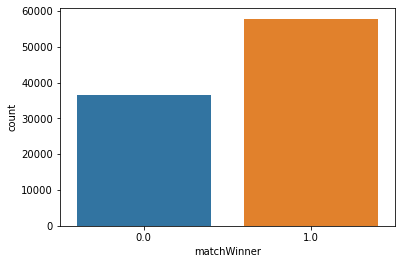

In [87]:
sns.countplot(df3.matchWinner)

In [89]:
Y = df3['matchWinner']
X = df3.drop('matchWinner', axis=1)

In [92]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, log_loss, plot_roc_curve, auc, precision_recall_curve, classification_report

In [93]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # podela na trening i test podatke

In [94]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True)

In [95]:
rf.fit(x_train, y_train)

RandomForestClassifier(oob_score=True)

# EDA

/home/milos/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/milos/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='opptPTS', ylabel='count'>

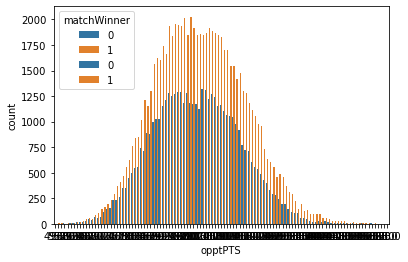

In [84]:
df2.teamPTS.mean()
df2.opptPTS.mean()
sns.countplot(df2.teamPTS, hue=df['matchWinner'])
sns.countplot(df2.opptPTS, hue=df['matchWinner'])#SA WINDOWSA NASTAVI EDA

In [82]:
df2.matchWinner.mean()

0.6130544039527954